In [1]:
# required for jupyter notebook
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)}) # set sns figure size

import os
import math

In [2]:
def show_corr_heatmap(df):
    # https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

    plt.figure(figsize=(20, 10))

    corr_matrix = df.corr()

    # mask to hide the upper triangle of the symmetric corr-matrix
    # mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

    heatmap = sns.heatmap(

        # correlation matrix
        corr_matrix,

        # mask the top triangle of the matrix
        # mask=mask,

        # two-contrast color, different color for + -
        cmap="PiYG",

        # color map range
        vmin=-1, vmax=1,

        # show corr values in the cells
        annot=True
    )

    # set a title
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

    plt.show()

In [3]:
# read raw csv by marking dropping missing values
missing_values = ['NIL', 'nil', '']
raw_df = pd.read_csv(os.path.join('..', '..', 'Datasets', 'water-level', 'barisal-weather-waterlevel_merged.csv'), 
                     na_values=missing_values)

raw_df.head()

,Station,Year,Month,Day,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day),MAX_WL(m),MIN_WL(m),AVE_WL(m)
0,Barisal,2017,1,1,25.2,13.8,0.0,1.0,94,62.0,6.3,4.5,277.72,1.17,0.13,0.65
1,Barisal,2017,1,2,25.4,13.8,0.0,1.0,94,62.0,5.5,5.3,257.52,1.10,0.11,0.65
2,Barisal,2017,1,3,25.6,13.4,0.0,1.0,94,61.0,6.2,4.6,275.20,1.05,0.08,0.65
3,Barisal,2017,1,4,25.4,14.0,0.0,1.0,94,64.0,6.3,4.5,277.72,0.99,0.04,0.60
4,Barisal,2017,1,5,23.0,13.0,0.0,1.0,94,68.0,4.0,6.8,219.63,0.95,0.02,0.55


**Dropping Station, Year, Day columns**

In [4]:
raw_df.drop(columns=['Station', 'Day'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1453 non-null   int64  
 1   Month                             1453 non-null   int64  
 2   Max Temp. (degree Celcius)        1452 non-null   float64
 3   Min Temp. (degree Celcius)        1451 non-null   float64
 4   Rainfall (mm)                     1325 non-null   float64
 5   Actual Evaporation (mm)           1419 non-null   float64
 6   Relative Humidity (morning, %)    1453 non-null   int64  
 7   Relative Humidity (afternoon, %)  1422 non-null   float64
 8   Sunshine (hour/day)               1453 non-null   float64
 9   Cloudy (hour/day)                 1453 non-null   float64
 10  Solar Radiation (cal/cm^2/day)    1453 non-null   float64
 11  MAX_WL(m)                         1453 non-null   float64
 12  MIN_WL

# Box-plots

## Feature columns

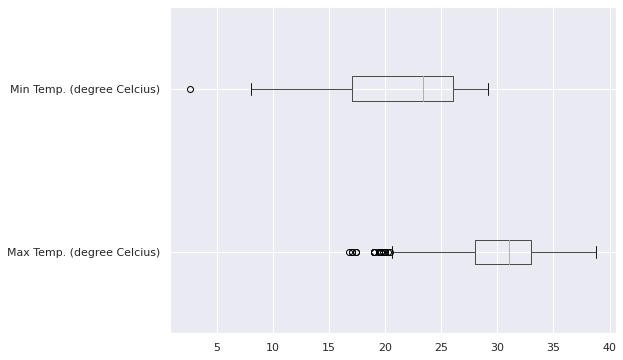

In [5]:
_=raw_df.boxplot(column=['Max Temp. (degree Celcius)', 'Min Temp. (degree Celcius)'], vert=False)

In [6]:
# _=raw_df.boxplot(column=['Rainfall (mm)'], vert=False)

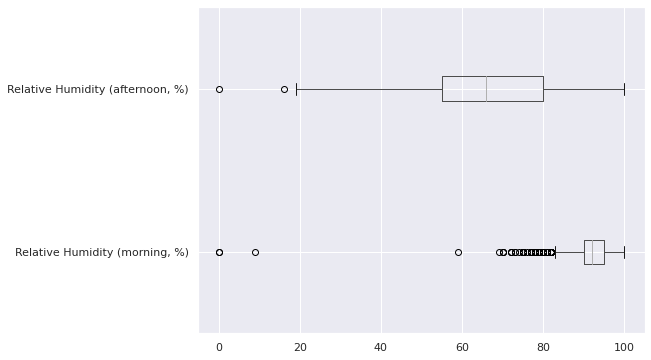

In [7]:
_=raw_df.boxplot(column=['Relative Humidity (morning, %)', 'Relative Humidity (afternoon, %)'], vert=False)

In [8]:
# _=raw_df.boxplot(column=['Actual Evaporation (mm)'], vert=False)

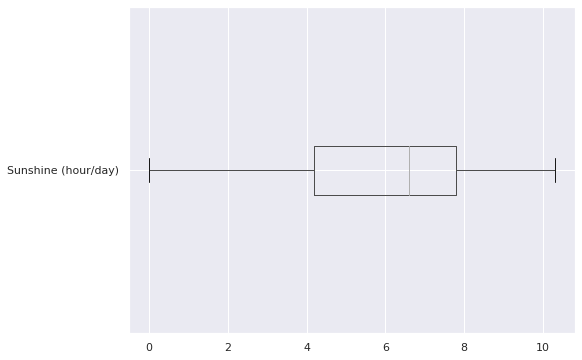

In [9]:
_=raw_df.boxplot(column=['Sunshine (hour/day)'], vert=False)

In [10]:
# _=raw_df.boxplot(column=['Cloudy (hour/day)'], vert=False)

**Cloudy hour/day cannot be more than 24!!!** 

In [11]:
raw_df['Cloudy (hour/day)'].max()

567.0

**MUST REMOVE INSTANCES WITH cloudy > 24**

In [12]:
raw_df.drop(raw_df.index[raw_df['Cloudy (hour/day)'] > 24.0], inplace=True)
raw_df['Cloudy (hour/day)'].max()

13.5

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1452
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1421 non-null   int64  
 1   Month                             1421 non-null   int64  
 2   Max Temp. (degree Celcius)        1420 non-null   float64
 3   Min Temp. (degree Celcius)        1419 non-null   float64
 4   Rainfall (mm)                     1293 non-null   float64
 5   Actual Evaporation (mm)           1387 non-null   float64
 6   Relative Humidity (morning, %)    1421 non-null   int64  
 7   Relative Humidity (afternoon, %)  1390 non-null   float64
 8   Sunshine (hour/day)               1421 non-null   float64
 9   Cloudy (hour/day)                 1421 non-null   float64
 10  Solar Radiation (cal/cm^2/day)    1421 non-null   float64
 11  MAX_WL(m)                         1421 non-null   float64
 12  MIN_WL

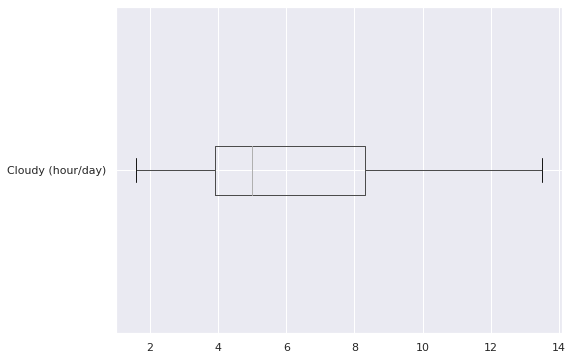

In [14]:
_=raw_df.boxplot(column=['Cloudy (hour/day)'], vert=False)

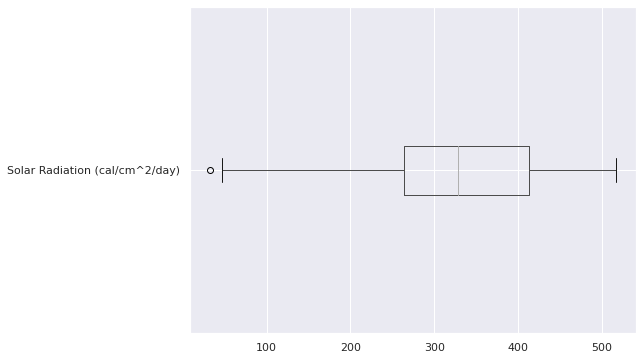

In [15]:
_=raw_df.boxplot(column=['Solar Radiation (cal/cm^2/day)'], vert=False)

## Water level columns

In [16]:
min_waterLevel_column = 'MIN_WL(m)'
max_waterLevel_column = 'MAX_WL(m)'
avg_waterLevel_column = 'AVE_WL(m)'

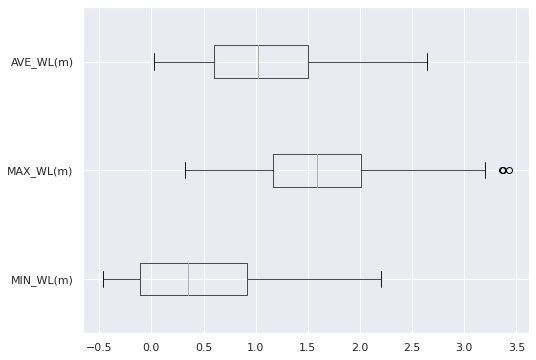

In [17]:
_=raw_df.boxplot(column=[min_waterLevel_column, max_waterLevel_column, avg_waterLevel_column], vert=False)

## Max Water Level Analysis

<AxesSubplot:>

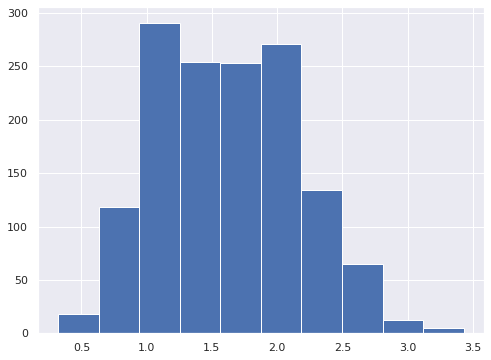

In [18]:
raw_df[max_waterLevel_column].hist(bins=10)

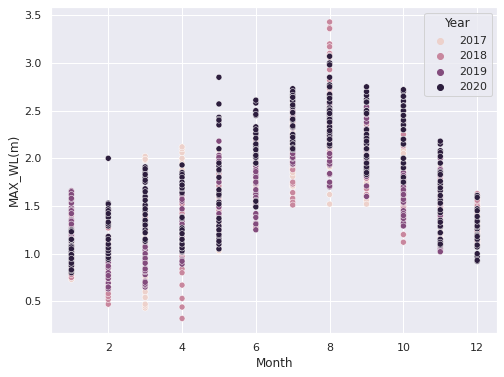

In [19]:
_=sns.scatterplot(data=raw_df, x='Month', y=max_waterLevel_column, hue='Year')

## Average Water Level Analysis

<AxesSubplot:>

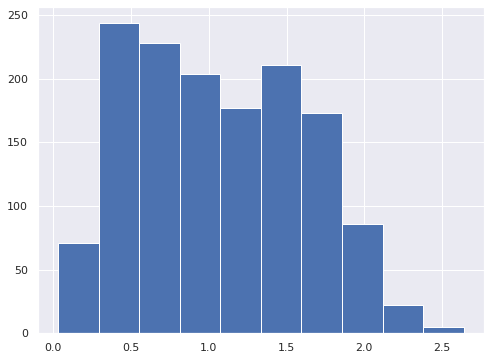

In [20]:
raw_df[avg_waterLevel_column].hist(bins=10)

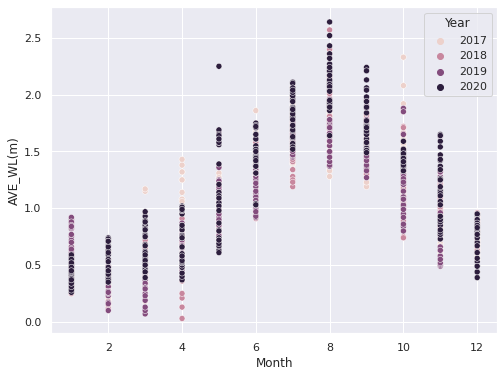

In [21]:
_=sns.scatterplot(data=raw_df, x='Month', y=avg_waterLevel_column, hue='Year')

# Water-level data Discretization

## Max water level

In [22]:
bins = pd.qcut(raw_df[max_waterLevel_column], 3)
bins.value_counts()

(0.319, 1.32]    477
(1.32, 1.89]     476
(1.89, 3.43]     468
Name: MAX_WL(m), dtype: int64

In [23]:
bins = pd.qcut(raw_df[avg_waterLevel_column], 3)
bins.value_counts()

(0.028999999999999998, 0.74]    479
(0.74, 1.37]                    474
(1.37, 2.64]                    468
Name: AVE_WL(m), dtype: int64

In [24]:
raw_df_discrete = raw_df.copy()
raw_df_discrete[max_waterLevel_column] = pd.cut(x=raw_df[max_waterLevel_column], bins=[0.319, 1.32, 1.89, 3.43],labels=[0, 1, 2])
raw_df_discrete[avg_waterLevel_column] = pd.cut(x=raw_df[avg_waterLevel_column], bins=[0.028, 0.74, 1.37, 2.64],labels=[0, 1, 2])

raw_df_discrete[max_waterLevel_column] = pd.to_numeric(raw_df_discrete[max_waterLevel_column])
raw_df_discrete[avg_waterLevel_column] = pd.to_numeric(raw_df_discrete[avg_waterLevel_column])

In [25]:
raw_df_discrete[max_waterLevel_column].value_counts()

0    477
1    476
2    468
Name: MAX_WL(m), dtype: int64

In [26]:
raw_df_discrete[avg_waterLevel_column].value_counts()

0    479
1    474
2    468
Name: AVE_WL(m), dtype: int64

In [27]:
raw_df_discrete.head()

,Year,Month,Max Temp. (degree Celcius),Min Temp. (degree Celcius),Rainfall (mm),Actual Evaporation (mm),"Relative Humidity (morning, %)","Relative Humidity (afternoon, %)",Sunshine (hour/day),Cloudy (hour/day),Solar Radiation (cal/cm^2/day),MAX_WL(m),MIN_WL(m),AVE_WL(m)
0,2017,1,25.2,13.8,0.0,1.0,94,62.0,6.3,4.5,277.72,0,0.13,0
1,2017,1,25.4,13.8,0.0,1.0,94,62.0,5.5,5.3,257.52,0,0.11,0
2,2017,1,25.6,13.4,0.0,1.0,94,61.0,6.2,4.6,275.20,0,0.08,0
3,2017,1,25.4,14.0,0.0,1.0,94,64.0,6.3,4.5,277.72,0,0.04,0
4,2017,1,23.0,13.0,0.0,1.0,94,68.0,4.0,6.8,219.63,0,0.02,0


## Correlation Heatmap

## Continuous water level

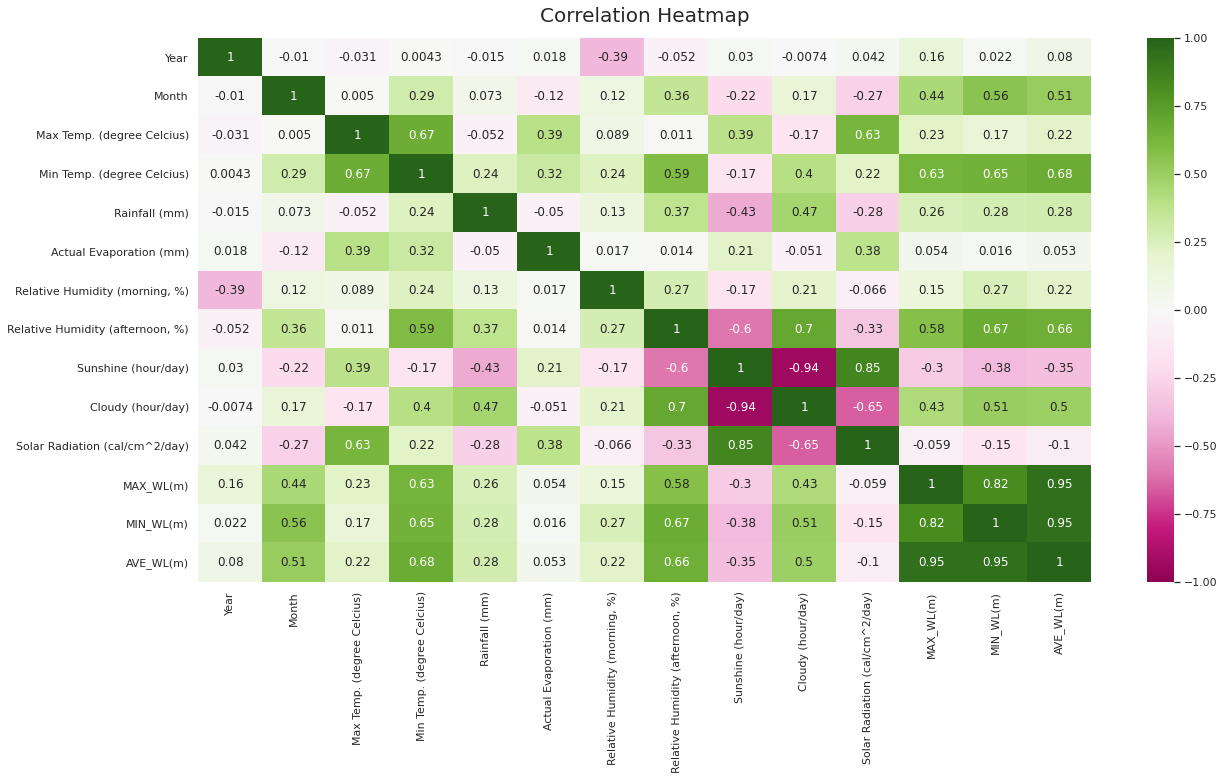

In [28]:
show_corr_heatmap(raw_df)

## Categorized water level

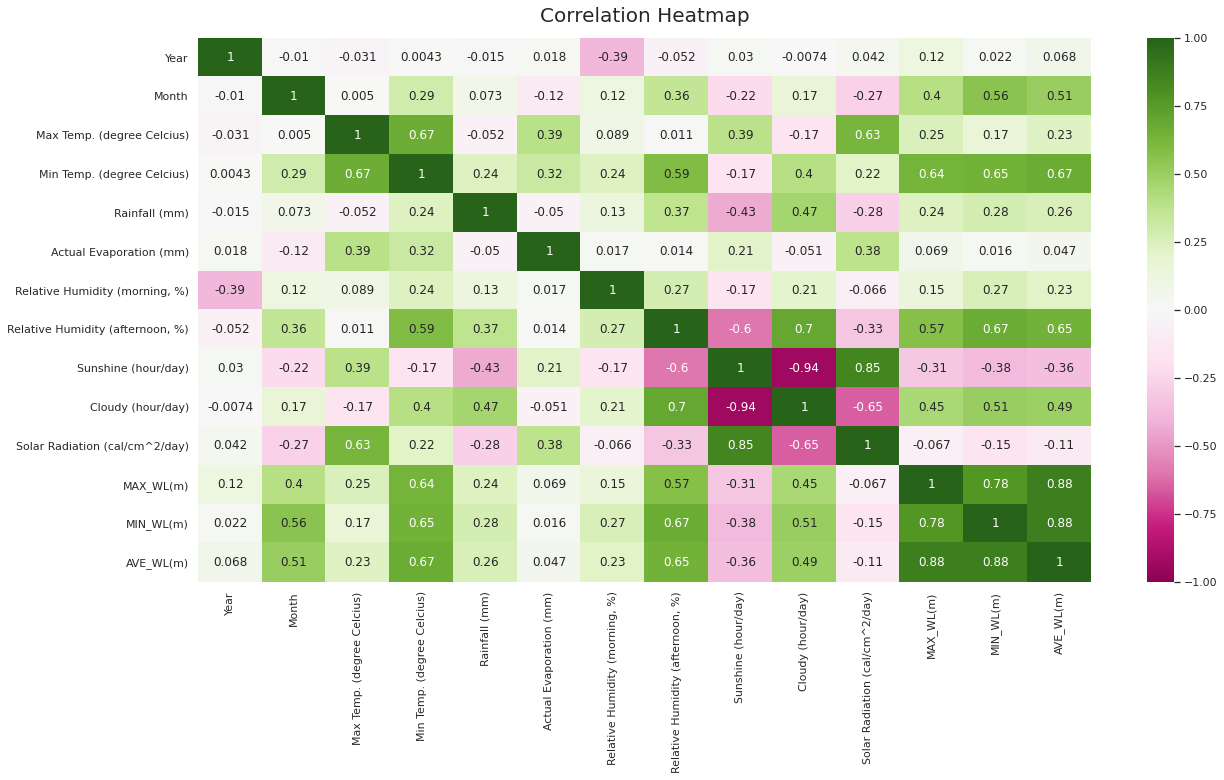

In [29]:
show_corr_heatmap(raw_df_discrete)

# Predict water level 'm' days before using mean of 'n' previous days data

In [30]:
from custom_utils import get_avg_df

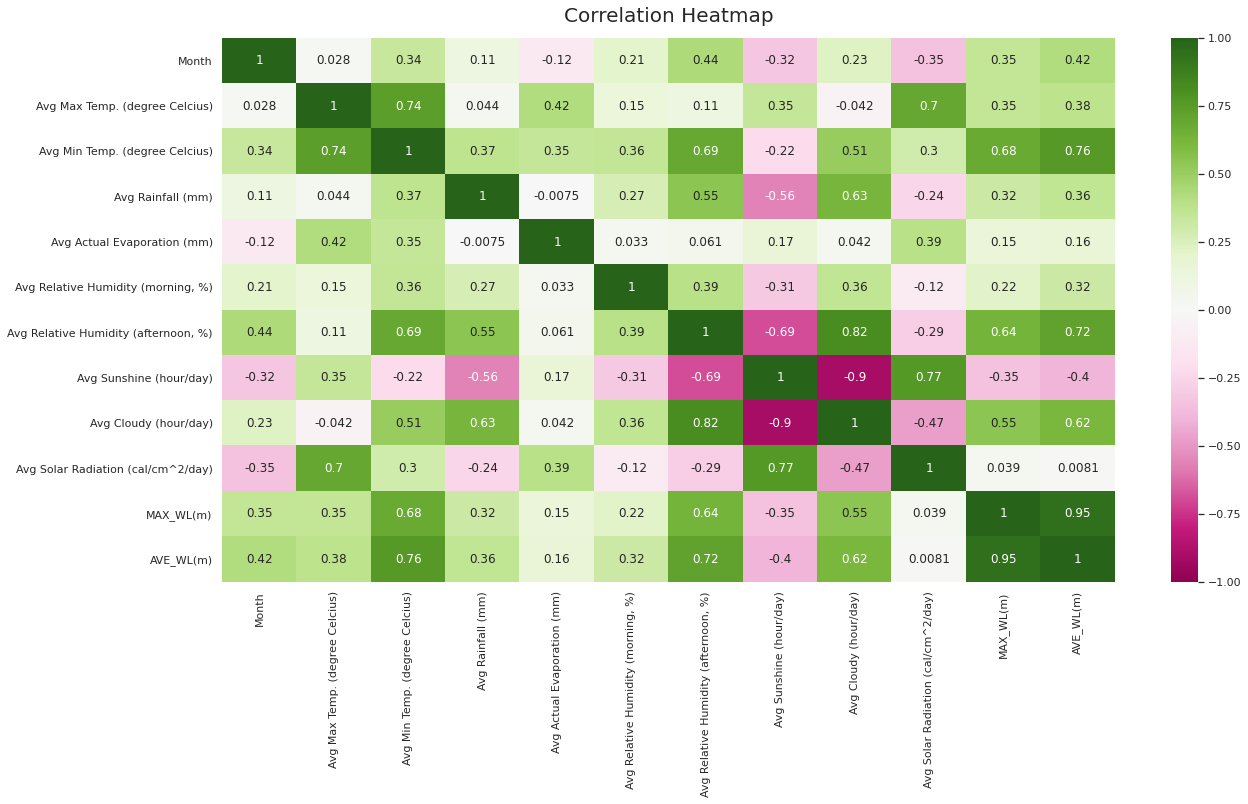

In [31]:
raw_df_avg = get_avg_df(raw_df, num_avg_days=10, num_days_before=5)
show_corr_heatmap(raw_df_avg)